This project is aimed at solidfying data science skills that have acquired over time.
In this notebook I will build a a car price predicton model that can predict cars price based on multiple features such as Car_Type,Car_Year,Car_Age, Fuel_Type and the Transmission, the data I will work with was extracted from a a local car listing platform called cheki.co.ke The notebook will be presented as follow :

<li>Data collection</li>
<li>Data Preprocessing & Cleansing</li>
<li>Exploratory data analysis & Visualisation</li>
<li>Data Modeling</li>
<li>Evaluting the Model</li>
<li>Model Flask API Development</li>

### Data Collection

Data was crawled from cheki.co.ke using an online tool import.io.
The columns crawled were:
<li>Car_Type</li>
<li>Car_Year</li>
<li>Fuel_Type</li>
<li>Transmission</li>
<li>Price</li>  

#### Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading the dataset

In [10]:
data =pd.read_csv('cheki.csv')
#data['Car_Type'].unique()

In [11]:
# creating a dataframe for the project
car_data = pd.DataFrame(data=None, index=None, columns=None)

#### Data cleaning

In [12]:
def data_pre_processing(price=data.Price,year=data.Car_Year): 
    """This function strips off unwanted string and characters from the data
    and creates a new column age"""  
    car_data['price']= data.Price.astype(str)
    car_data['price']=[x.strip('KSh') for x in car_data.price]
    car_data['price']=[x.replace(',', "") for x in car_data.price]
    car_data['price']=car_data['price'].astype(float)
    car_data['Car_Year']=data.Car_Year.astype(str)
    car_data['Car_Year']=[x.strip(' -') for x in car_data.Car_Year]
    car_data['Car_Year']=[x.replace(',', "") for x in car_data.Car_Year]
    car_data['Car_Year']=car_data['Car_Year'].astype(np.int64)
    car_data['Car_Age']=2018- car_data['Car_Year']
    car_data['Car_Year']=car_data['Car_Year'].astype('category')
    car_data['Car_Type']=data['Car_Type'].astype('category')
    car_data['Fuel_Type']=data['Fuel_Type'].astype(str)
    car_data['Fuel_Type']=[x.strip(" -") for x in car_data.Fuel_Type]
    car_data['Fuel_Type']=car_data['Fuel_Type'].astype('category')
    car_data['Transmission']=data['Transmission'].astype('category')
data_pre_processing()

In [15]:
car_data.head(2)

,price,Car_Year,Car_Age,Car_Type,Fuel_Type,Transmission
0,1000000.0,2009,9,Nissan Navara,Diesel,Manual
1,1000000.0,2003,15,Mercedes-Benz E250,Petrol,Automatic


In [16]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 6 columns):
price           1378 non-null float64
Car_Year        1378 non-null category
Car_Age         1378 non-null int64
Car_Type        1378 non-null category
Fuel_Type       1378 non-null category
Transmission    1378 non-null category
dtypes: category(4), float64(1), int64(1)
memory usage: 42.6 KB


In [17]:
car_data.describe()

,price,Car_Age
count,1.378000e+03,1378.000000
mean,2.073563e+06,7.810595
std,2.091921e+06,3.024418
min,1.950000e+05,-1.000000
25%,8.800000e+05,7.000000
50%,1.350000e+06,7.000000
75%,2.450000e+06,8.000000
max,1.800000e+07,32.000000


#### What is the  lowest priced vehicle in cheki.co.ke?

In [13]:
car_data[car_data['price']==car_data['price'].min()]

,price,Car_Year,Car_Age,Car_Type,Fuel_Type,Transmission
509,195000.0,1994,24,Subaru Leone,Petrol,Manual


The lowest priced vehicle was a Subaru Leone going for Kshs 195000.0
made in in the year 1994.


#### What is the highest priced vehicle in cheki.co.ke?

In [14]:
car_data[car_data['price']==car_data['price'].max()]

,price,Car_Year,Car_Age,Car_Type,Fuel_Type,Transmission
507,18000000.0,2016,2,Lexus LX,Diesel,Automatic
508,18000000.0,2018,0,Toyota Land Cruiser,Diesel,Automatic


The highest priced vehicles were a 2016 Lexus LX and 2018 Toyota Land Cruiser going for Kshs 18,000000 made in the year 2018

#### What are the Top Five Most Sold Vehicles on Cheki.co.ke?

In [18]:
car_data['Car_Type'].value_counts().head(5)

Toyota Land Cruiser Prado    89
Toyota Harrier               50
Toyota Fielder               40
Toyota Probox                37
Toyota Axio                  36
Name: Car_Type, dtype: int64

** What was the average (mean) Car Price of all cars per year?  ? **

In [241]:
#car_data.groupby('Car_Year').mean()['price']

** Is there a correlation between car age  and Car Price? **

In [19]:
car_data[['Car_Age','price']].corr()

,Car_Age,price
Car_Age,1.000000,-0.350904
price,-0.350904,1.000000


We can observe that there is a slight correlation between the car age ant its price

### Exploratory Data Analysis

In [20]:
sns.set_style('whitegrid')

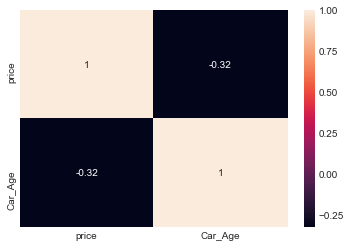

In [53]:
#Correlation
sns.heatmap(car_data.corr(),annot=True)

From the above heatmap we do observe  a slight correlation between
the car price and the car year

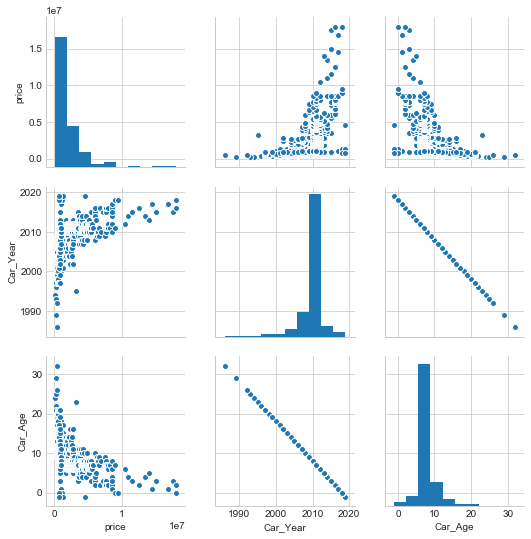

In [21]:
sns.pairplot(car_data,palette="husl")

C:\Conda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


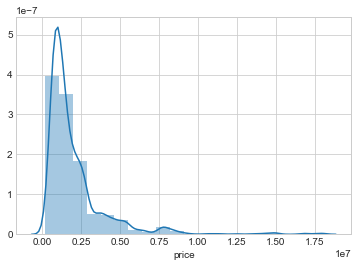

In [22]:
sns.distplot(car_data['price'],bins=20)

From the plot above we can observe that most vehicles range between kshs 150,000 to slightly above kshs 800,000

** Bar plot showing the distribution of car prices against the Car Age **

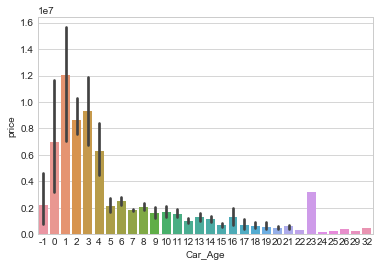

In [23]:
sns.barplot(x=car_data['Car_Age'],y=car_data['price'],
            data=car_data)

As we can see from the plot above, the cars price decreases respectivly as they age, and more explicitly we can say that the more the car is recently released, the price augment. This is totally logical since whenever the cars become kind of old from the date of release, the price also decreases.

** Violinplot showing the price against the Fuel Type  **

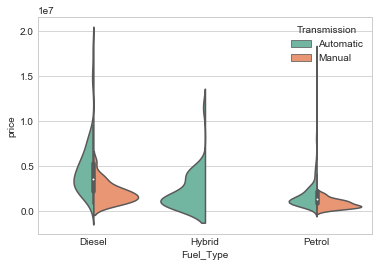

In [24]:
sns.violinplot(y=car_data['price'],x=car_data['Fuel_Type'],
               hue=car_data['Transmission'],split=True,
               palette="Set2",data=car_data)

From the plot above, we can clearly visualise insights such as the minimum, maximum price for 'Diesel automatic/manual' cars and also get perception on the Median values.

#### Top 15 Car Type distribution

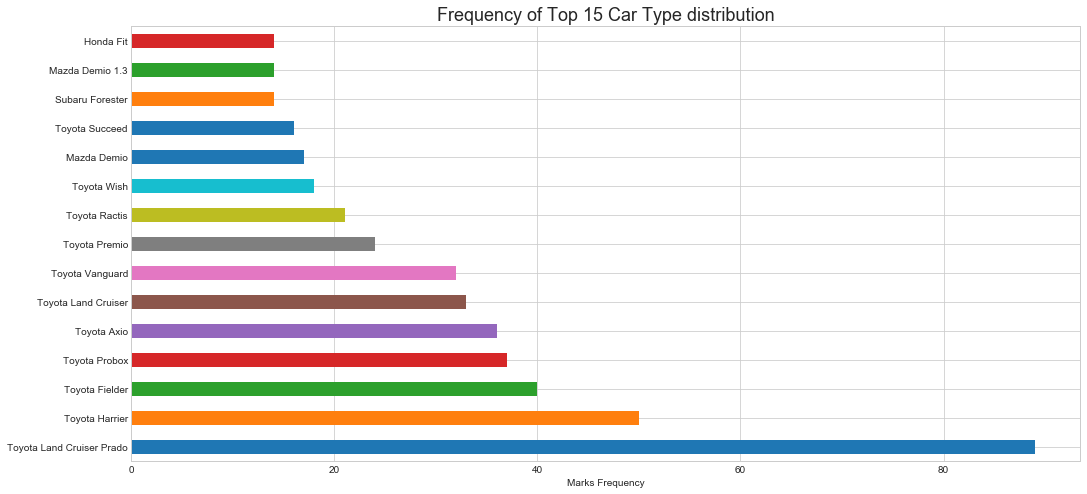

In [25]:
plt.figure(figsize=(17,8))
car_data.Car_Type.value_counts().nlargest(15).plot(kind='barh')
plt.xlabel('Marks Frequency')
plt.title("Frequency of Top 15 Car Type distribution",fontsize=18)
plt.show()

#### Further Data Preprocessing
** Converting categorical variables to factor variables **

** Approach #1  - One Hot Encoding using pd.get_dummies ***

In [196]:
car_data.columns


Index(['price', 'Car_Year', 'Car_Age', 'Car_Type', 'Fuel_Type',
       'Transmission'],
      dtype='object')

In [26]:
x = car_data[['Car_Age', 'Car_Type', 'Fuel_Type', 'Transmission']]
y = car_data.price
x = pd.get_dummies(data=x)
x.head(6)

,Car_Age,Car_Type_Audi A3,Car_Type_Audi A4,Car_Type_Audi A4 1.8 Automat,Car_Type_Audi A4 Avant 1.8 T Quattro,Car_Type_Audi A4 Avant 2.0 T FSI,Car_Type_Audi A5,Car_Type_Audi A6,Car_Type_Audi Q5,Car_Type_Audi Q5 2.0 T,...,Car_Type_Volkswagen Touareg 3.6 FSi,Car_Type_Volkswagen Touareg 3.6 V6,Car_Type_Volkswagen Touran 1.4 TSI,Car_Type_Volvo S60 1.6 T4,Car_Type_Volvo S80 2.5 T,Fuel_Type_Diesel,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


** Approach #2 Scikit-Learn using label- Encoding **

In [ ]:
car_data2=car_data.copy()
from sklearn.preprocessing import LabelEncoder
def model_data(data=modelling_car_data2):
    """Function to label encode categorical variables"""
    lb_make = LabelEncoder()
    car_data2["Car_Type_Code"] = lb_make.fit_transform(car_data2["Car_Type"])
    car_data2["Fuel_Type_Code"] = lb_make.fit_transform(car_data2["Fuel_Type"])
    car_data2["Transmission_Code"] = lb_make.fit_transform(car_data2["Transmission"])
    car_data2["Car_Year_Code"] = lb_make.fit_transform(car_data2["Car_Year"])
    return
model_data()
car_data2.head(3)
car_data_to

### Training a Linear Regression Model
Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column.

Train Test Split
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3,
                                                    random_state=101)

### Creating and Training the Model

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
# Instatiating the model
lm = LinearRegression()

In [31]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [216]:
print(lm.intercept_)


-6.090860170034043e+17


In [204]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])

### Predictions from our Model

Let's grab predictions off  test set and see how well it did!

In [32]:
predictions = lm.predict(x_test)

In [222]:
#predictions

In [221]:
#y_test

In [33]:
residual = y_test - predictions

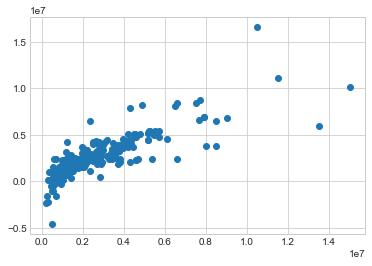

In [34]:
plt.scatter(y_test,predictions)

**Residual Histogram**

C:\Conda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


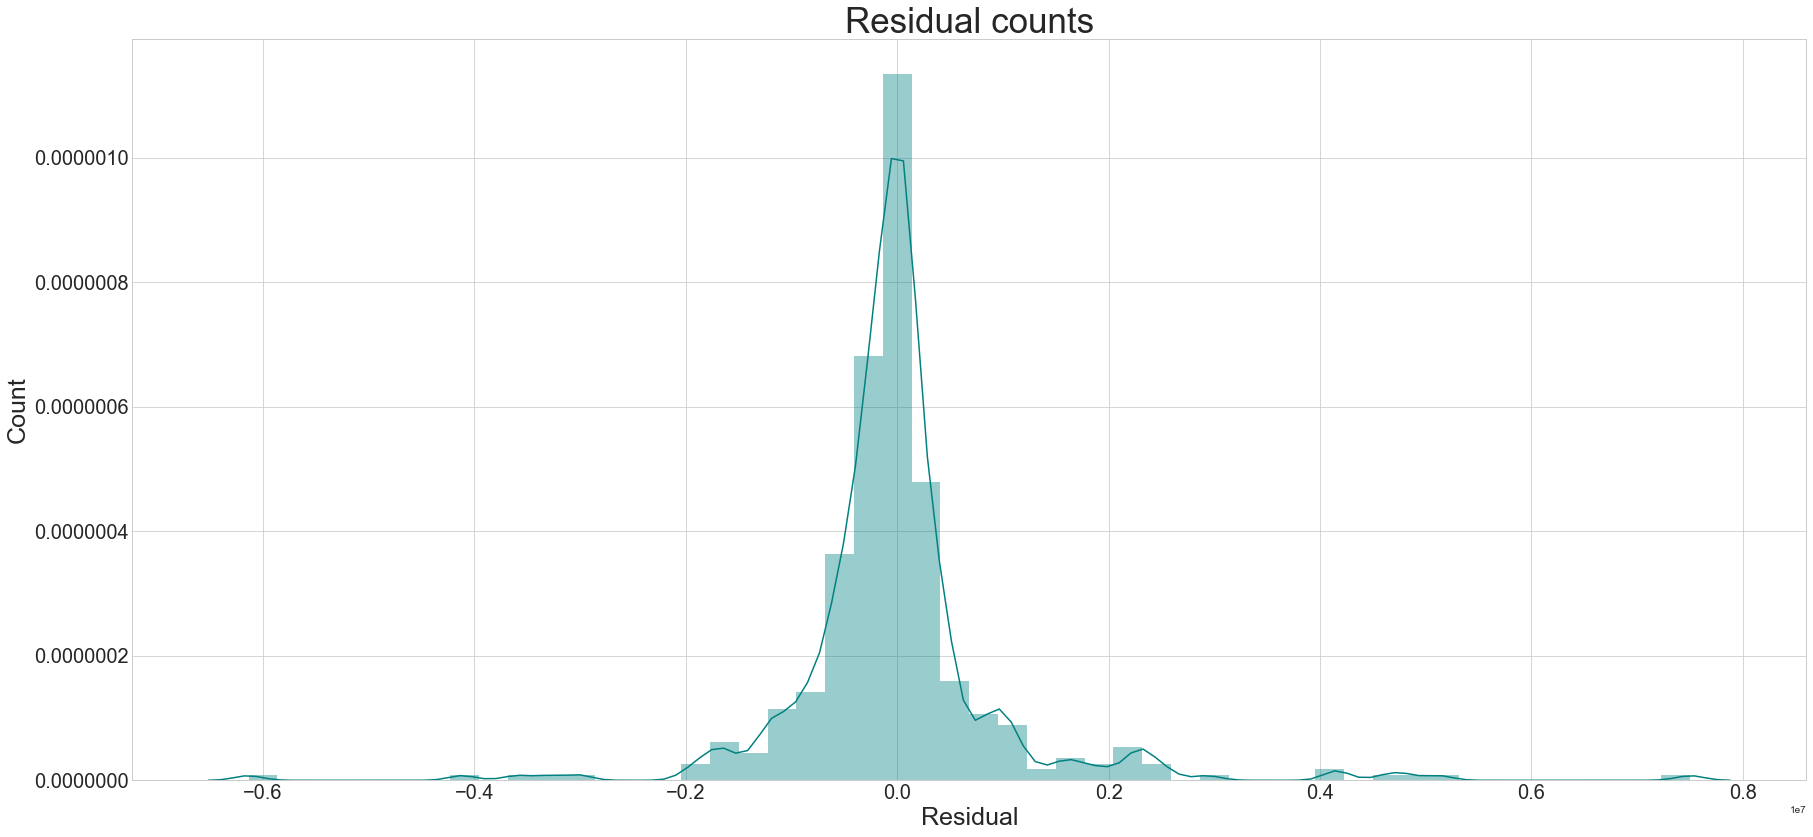

In [35]:
fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)
plt.show()

In [36]:
from sklearn import metrics

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 562713.9821022303
MSE: 1068127762893.5051
RMSE: 1033502.6670954967


### Decision Tree Regression

C:\Conda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


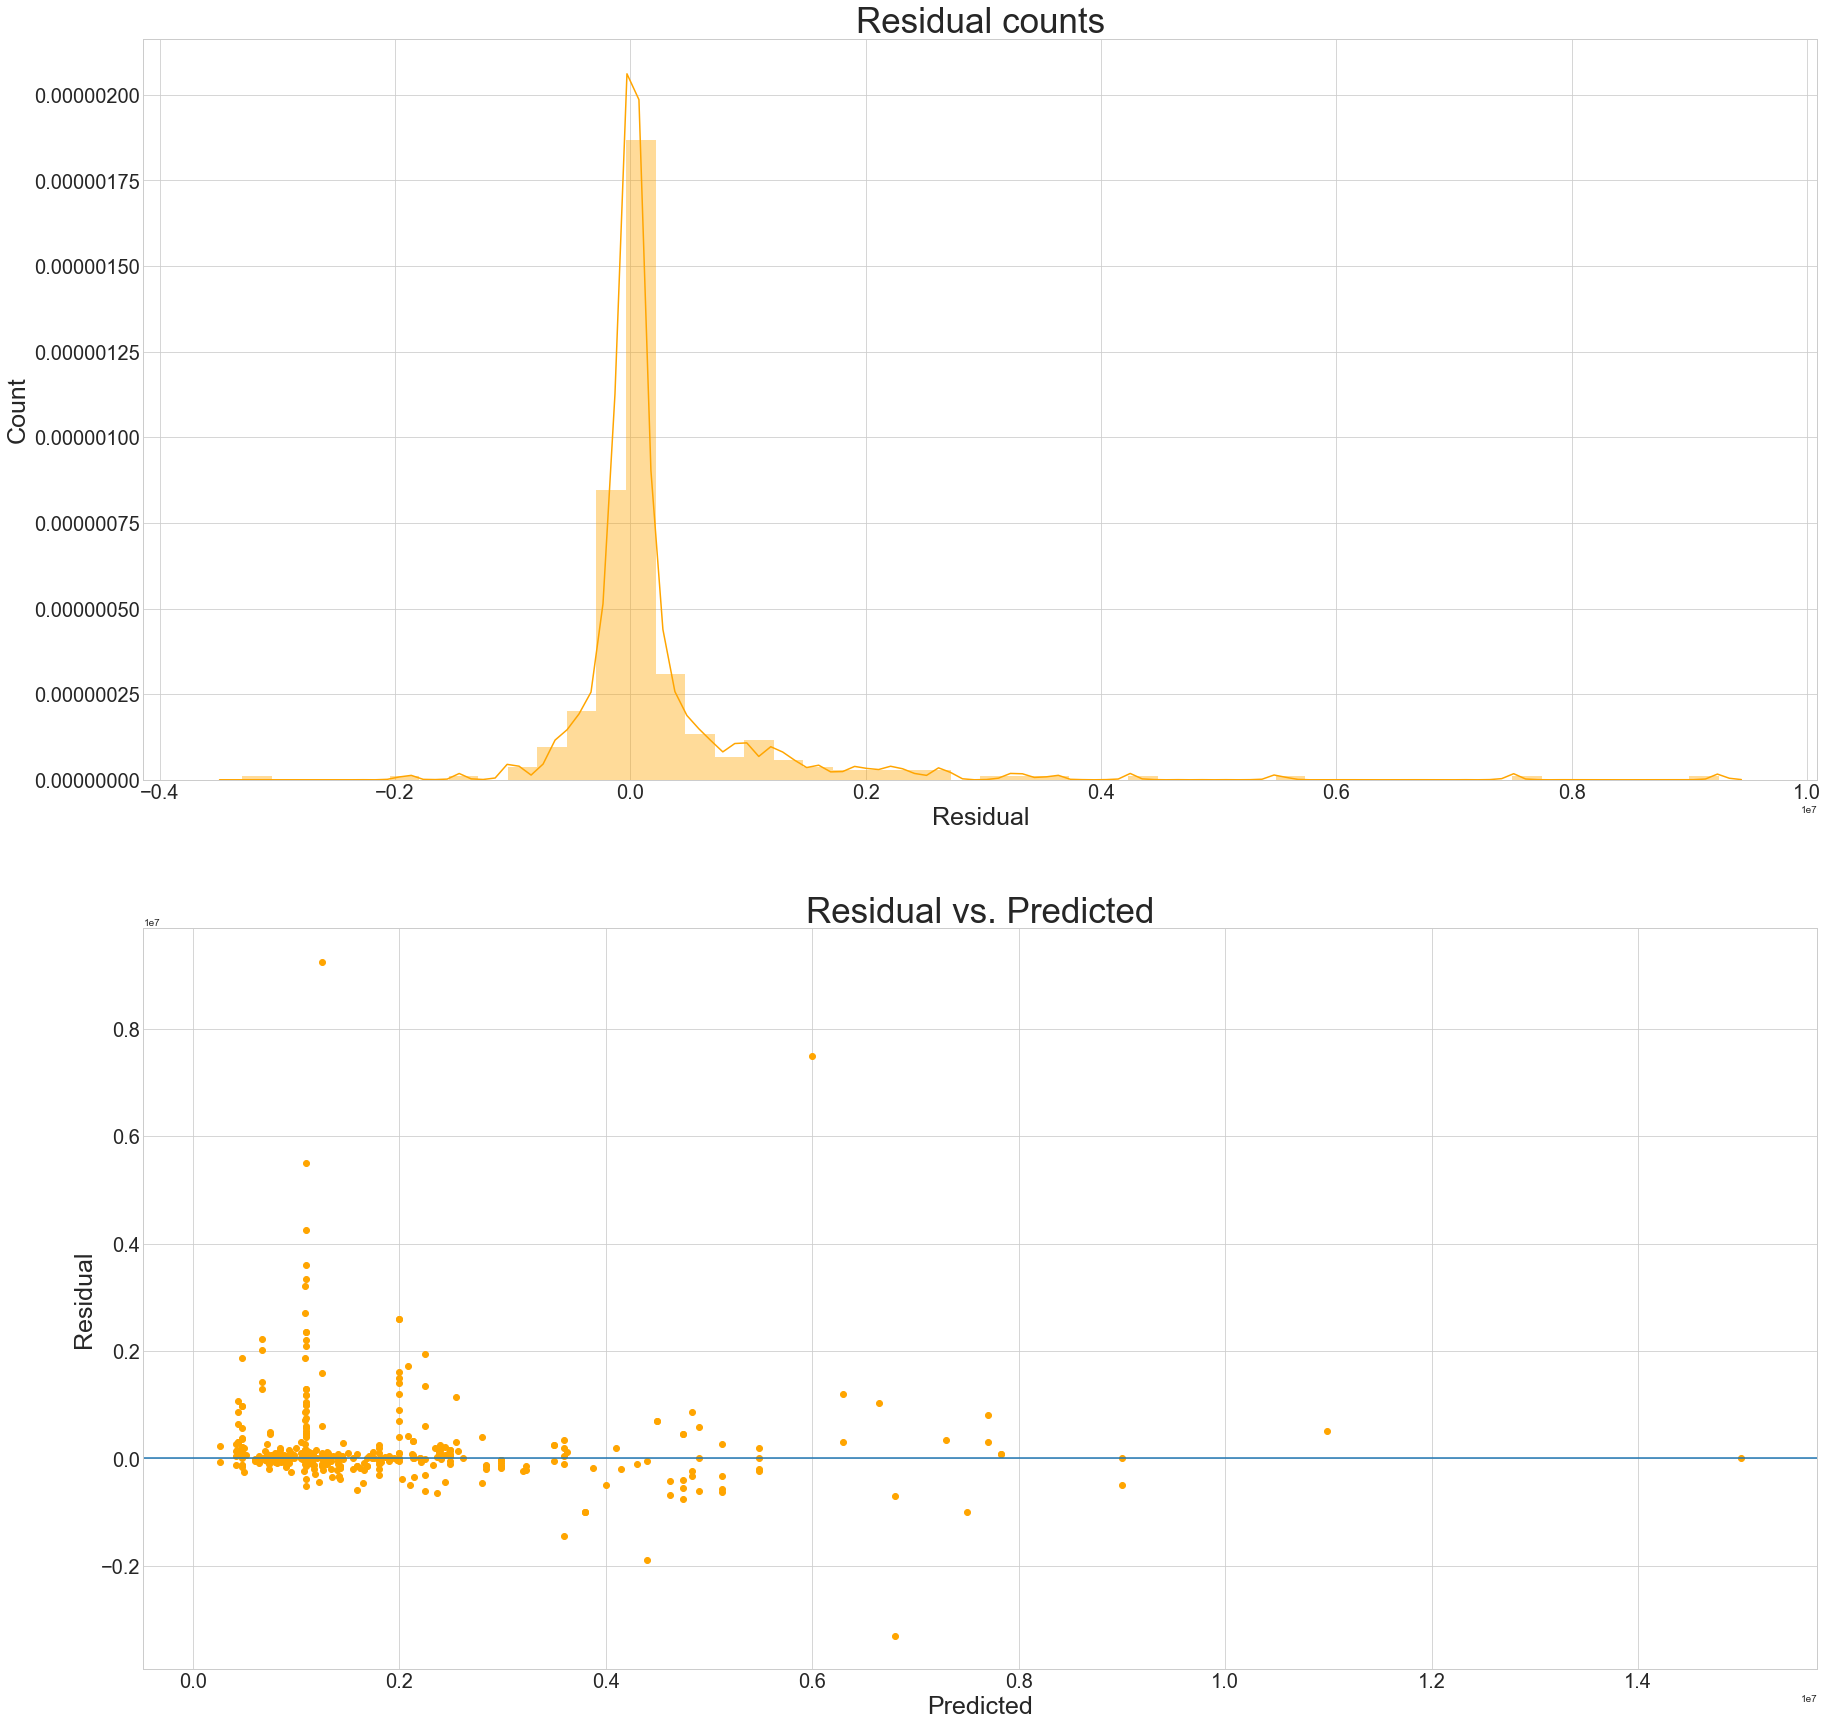

RMSE:
940723.9590830983


In [38]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_features='auto')
dtr.fit(x_train, y_train)
predicted = dtr.predict(x_test)
residual = y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE:')
print(rmse)

### GradientBoostingRegressor

C:\Conda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


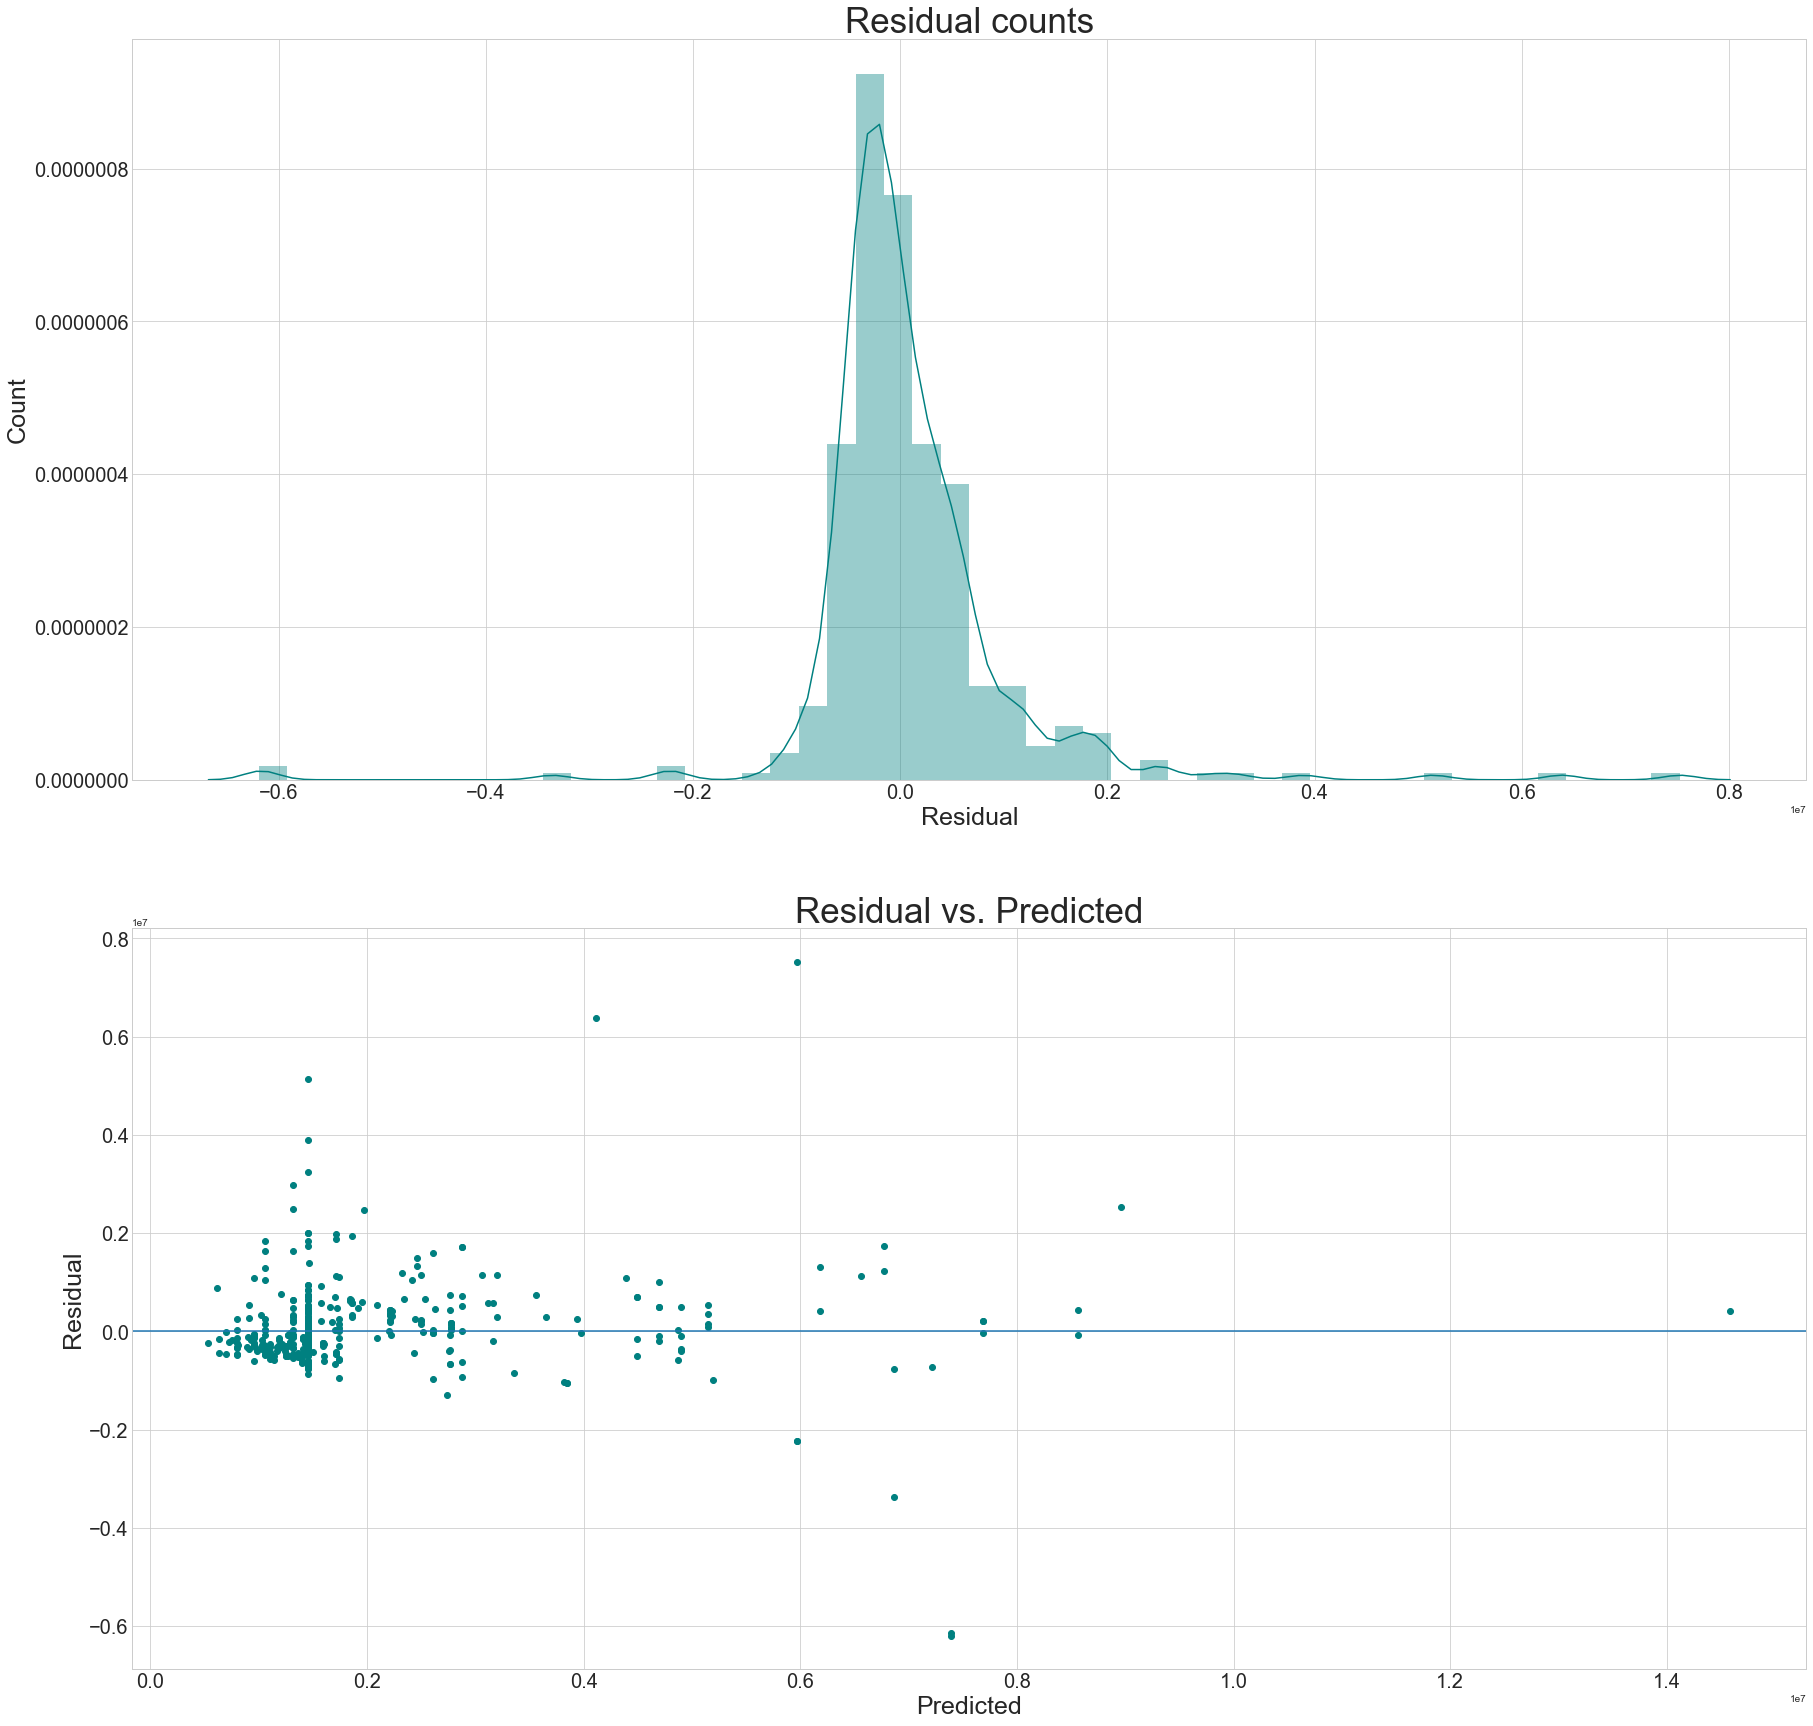

RMSE:
995622.466333894


In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(loss ='ls', max_depth=6)
gbr.fit (x_train, y_train)
predicted = gbr.predict(x_test)
residual = y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE:')
print(rmse)

The Decision Tree Regression performed better than the linear regression and the GradientBoostingRegressor. The model is still performing poorly.Further data colllection,cleansing and pre processing should be performed before model tuning 

#### Model Tuning

#### Flask API Development